# Basket Analysis

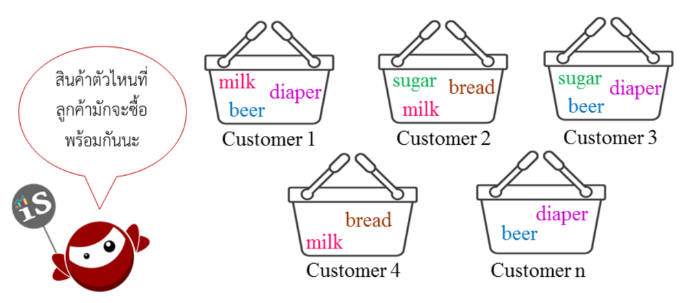

- by [<img src="http://rasbt.github.io/mlxtend/img/logo.png" height="32">](http://rasbt.github.io/mlxtend/)

# Apriori Algorithm

อัลกอริทึม Apriori เป็นเทคนิคที่ถูกนำมาใช้ในการขุดหา association rule ในฐานข้อมูลที่มีการทำธุรกรรม มีประสิทธิภาพในการระบุชุดรายการที่เป็นที่นิยมและสร้าง association rule อัลกอริทึมนี้ใช้วิธีการ "bottom-up" และมีพื้นฐานบนหลัก Apriori

**Key Steps:**

1. **Generate Frequent Itemsets:**
   อัลกอริทึมเริ่มด้วยการค้นหา frequent itemsets ซึ่งเป็นชุดของสินค้าที่เกิดขึ้นพร้อมกันในการทำธุรกรรมมากกว่า minimum support threshold

2. **Join Step:**
   ในขั้นตอนนี้อัลกอริทึมสร้าง candidate itemsets โดยการรวม frequent itemsets จากการทำซ้ำก่อนหน้า

3. **Prune Step:**
   candidate itemsets ที่ไม่ตรงตามเกณฑ์ minimum support threshold จะถูกตัดทิ้งเพื่อลดพื้นที่ในการค้นหา

4. **Repeat the Join and Prune Steps:**
   อัลกอริทึมทำซ้ำในกระบวนการรวมและตัดจนกว่าจะไม่สามารถสร้าง frequent itemsets ใหม่ได้

5. **Generate Association Rules:**
   เมื่อได้รับ frequent itemsets แล้ว association rules จะถูกสร้างขึ้นจากชุดรายการเหล่านี้ กฎประกอบด้วย antecedent (ด้านซ้าย) และส่วน consequent (ด้านขวา)

6. **Calculate Metrics:**
   ตัวชี้วัดเช่น support, confidence, และ lift ถูกคำนวณสำหรับแต่ละ association rule เพื่อวัดความแข็งแกร่งและความสำคัญของความสัมพันธ์

![Apriori Algorithm](https://www.codeproject.com/KB/recipes/AprioriAlgorithm/4-Example.JPG)

(image from: https://www.codeproject.com/Articles/70371/Apriori-Algorithm)

# Extract frequent itemsets

เริ่มจากการหา frequent itemsets
- ใช้ dataset จากไฟล์ `Groceries_dataset.csv`
- อัพโหลดขึ้น sample_data

## สร้าง DataFrame

- เรียกใช้ `pandas`

In [1]:
import pandas as pd

- อ่านไฟล์ `Groceries_dataset.csv` จาก sample_data โดยคลิ๊กขวาที่ชื่อไฟล์ แล้วเลือก `Copy path`

In [2]:
data = pd.read_csv('/content/sample_data/Groceries_dataset.csv')
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
data.shape

(38765, 3)

In [4]:
data.sort_values(['Member_number', 'Date'])

,Member_number,Date,itemDescription
4843,1000,15-03-2015,sausage
8395,1000,15-03-2015,whole milk
20992,1000,15-03-2015,semi-finished bread
24544,1000,15-03-2015,yogurt
13331,1000,24-06-2014,whole milk
...,...,...,...
3578,5000,10-02-2015,soda
19727,5000,10-02-2015,root vegetables
34885,5000,10-02-2015,semi-finished bread
9340,5000,16-11-2014,bottled beer


In [6]:
len(data.groupby(['Member_number', 'Date']))

14963

- ดูรายการสินค้าและความถี่

In [7]:
data['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

- ทำให้อยู่ในรูปของ list of transactions

In [8]:
list(data.groupby(['Member_number', 'Date']))[:3]

[((1000, '15-03-2015'),
         Member_number        Date      itemDescription
  4843            1000  15-03-2015              sausage
  8395            1000  15-03-2015           whole milk
  20992           1000  15-03-2015  semi-finished bread
  24544           1000  15-03-2015               yogurt),
 ((1000, '24-06-2014'),
         Member_number        Date itemDescription
  13331           1000  24-06-2014      whole milk
  29480           1000  24-06-2014          pastry
  32851           1000  24-06-2014     salty snack),
 ((1000, '24-07-2015'),
         Member_number        Date  itemDescription
  2047            1000  24-07-2015      canned beer
  18196           1000  24-07-2015  misc. beverages)]

In [9]:
list(data.groupby(['Member_number', 'Date']))[0]

((1000, '15-03-2015'),
        Member_number        Date      itemDescription
 4843            1000  15-03-2015              sausage
 8395            1000  15-03-2015           whole milk
 20992           1000  15-03-2015  semi-finished bread
 24544           1000  15-03-2015               yogurt)

In [10]:
list(data.groupby(['Member_number', 'Date']))[0][1]

,Member_number,Date,itemDescription
4843,1000,15-03-2015,sausage
8395,1000,15-03-2015,whole milk
20992,1000,15-03-2015,semi-finished bread
24544,1000,15-03-2015,yogurt


In [11]:
list(data.groupby(['Member_number', 'Date']))[0][1]['itemDescription']

4843                 sausage
8395              whole milk
20992    semi-finished bread
24544                 yogurt
Name: itemDescription, dtype: object

In [12]:
list(data.groupby(
    ['Member_number', 'Date']))[0][1]['itemDescription'].tolist()

['sausage', 'whole milk', 'semi-finished bread', 'yogurt']

In [15]:
transactions = [
    a[1]['itemDescription'].tolist()
    for a in list(data.groupby(['Member_number', 'Date']))]
transactions[:10]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

## ปรับรูปแบบ transactions

transactions จะต้องอยู่ในรูปแบบของตาราง ที่แต่ละแถวแสดงการมี (True) หรือไม่มี (False) สินค้าใน 1 รายการของ transaction
- ใช้ `TransactionEncoder`  

In [16]:
from mlxtend.preprocessing import TransactionEncoder

In [17]:
te = TransactionEncoder()
te.fit(transactions)
t_encode = te.transform(transactions)
t_encode

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [18]:
df = pd.DataFrame(t_encode, columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Apriori

หา frequent itemsets ด้วย Apriori
- เรียกใช้ `apriori` library

In [19]:
from mlxtend.frequent_patterns import apriori

In [32]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

- หา frequent itemsets

In [25]:
15000*.001

15.0

In [26]:
fia = apriori(df, min_support=0.001, use_colnames=True)
fia

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
...,...,...
745,0.001136,"(rolls/buns, sausage, whole milk)"
746,0.001002,"(rolls/buns, soda, whole milk)"
747,0.001337,"(rolls/buns, yogurt, whole milk)"
748,0.001069,"(whole milk, sausage, soda)"


- ผลลัพธ์ที่ได้จะเป็น DataFrame
- สามารถปรับแต่งได้ตามต้องการ เช่น เพิ่ม Series ที่แสดงจำนวนรายการใน itemset

In [27]:
fia['length'] = fia['itemsets'].apply(lambda x: len(x))
fia

,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1
...,...,...,...
745,0.001136,"(rolls/buns, sausage, whole milk)",3
746,0.001002,"(rolls/buns, soda, whole milk)",3
747,0.001337,"(rolls/buns, yogurt, whole milk)",3
748,0.001069,"(whole milk, sausage, soda)",3


- สามารถค้นหา itemsets ที่ต้องการได้

In [28]:
fia[fia['length']==2]

,support,itemsets,length
149,0.001069,"(bottled water, UHT-milk)",2
150,0.002139,"(other vegetables, UHT-milk)",2
151,0.001804,"(rolls/buns, UHT-milk)",2
152,0.001002,"(root vegetables, UHT-milk)",2
153,0.001136,"(sausage, UHT-milk)",2
...,...,...,...
736,0.002941,"(yogurt, whipped/sour cream)",2
737,0.003141,"(whole milk, white bread)",2
738,0.001069,"(yogurt, white bread)",2
739,0.001270,"(whole milk, white wine)",2


In [29]:
fia[(fia['length']==2) & (fia['support']>=0.01)]

,support,itemsets,length
609,0.010559,"(rolls/buns, other vegetables)",2
625,0.014837,"(whole milk, other vegetables)",2
677,0.013968,"(rolls/buns, whole milk)",2
717,0.011629,"(soda, whole milk)",2
740,0.011161,"(whole milk, yogurt)",2


In [31]:
fia[fia['itemsets'] == {'yogurt', 'whole milk'}]

,support,itemsets,length
740,0.011161,"(whole milk, yogurt)",2


# [FP-Growth Algorithm](https://www.geeksforgeeks.org/ml-frequent-pattern-growth-algorithm/)

อัลกอริทึม FP-Growth (Frequent Pattern-Growth) เป็นทางเลือกในการขุดหา frequent itemsets แทนอัลกอริทึม Apriori ในชุดข้อมูลขนาดใหญ่

**Key Steps:**

1. **Build FP-Tree:**
   อัลกอริทึมสร้าง FP-Tree

2. **Construct Conditional Pattern Bases:**
   สร้าง conditional pattern base จาก FP-Tree

3. **Mine Frequent Itemsets:**
   หา Frequent itemsets จากการสำรวจ Conditional Pattern Bases โดยไม่ต้องสร้างและตัดรายการตัวเลือก

4. **Generate Association Rules:**
   เช่นเดียวกับอัลกอริทึม Apriori กฎความสัมพันธ์จะถูกสร้างขึ้นจาก frequent itemsets

## FP-Growth

หา frequent itemsets ด้วย FP-Growth

- เรียกใช้ `fpgrowth` library

In [33]:
from mlxtend.frequent_patterns import fpgrowth

- หา frequent itemsets

In [34]:
fif = fpgrowth(df, min_support=0.001, use_colnames=True)
fif

,support,itemsets
0,0.157923,(whole milk)
1,0.085879,(yogurt)
2,0.060349,(sausage)
3,0.009490,(semi-finished bread)
4,0.051728,(pastry)
...,...,...
745,0.001403,"(chewing gum, yogurt)"
746,0.001069,"(chewing gum, other vegetables)"
747,0.001002,"(chewing gum, soda)"
748,0.001069,"(whole milk, pasta)"


In [37]:
fif[fif['itemsets'] == {'sausage', 'UHT-milk'}]

,support,itemsets
565,0.001136,"(sausage, UHT-milk)"


In [36]:
fia[fia['length']==2]

,support,itemsets,length
149,0.001069,"(bottled water, UHT-milk)",2
150,0.002139,"(other vegetables, UHT-milk)",2
151,0.001804,"(rolls/buns, UHT-milk)",2
152,0.001002,"(root vegetables, UHT-milk)",2
153,0.001136,"(sausage, UHT-milk)",2
...,...,...,...
736,0.002941,"(yogurt, whipped/sour cream)",2
737,0.003141,"(whole milk, white bread)",2
738,0.001069,"(yogurt, white bread)",2
739,0.001270,"(whole milk, white wine)",2


# Association Rules

Association rules เป็นการแสดงความสัมพันธ์ทางตรรกะระหว่างสินค้าโดยขึ้นอยู่กับการเกิดขึ้นร่วมกันในการทำธุรกรรม กฎเหล่านี้ช่วยให้มีความเข้าใจในพฤติกรรมและความชอบของลูกค้า เพื่อช่วยธุรกิจในการตัดสินใจอย่างมีข้อมูล

**Format of Association Rule:**
- Antecedent (Left-hand side) -> Consequent (Right-hand side)

## Metrics

**1. Support:**

Support is the proportion of transactions that contain both the antecedent and the consequent of an association rule.

```
Support(A->B) = (Number of Transactions containing A and B) / (Total Number of Transactions)
```

**Example:**
Suppose out of 100 transactions, 40 contain both items A and B.
```
Support(A->B) = 40 / 100 = 0.4
```

**2. Confidence:**

Confidence is the probability of finding the consequent in a transaction given that the antecedent is already present in that transaction.

```
Confidence(A->B) = (Number of Transactions containing A and B) / (Number of Transactions containing A)
```

**Example:**
Out of the 60 transactions containing item A, 40 also contain item B.
```
Confidence(A->B) = 40 / 60 = 0.6667
```

**3. Lift:**

Lift measures the ratio of observed support to expected support for an association rule. It indicates how much more likely the items in the antecedent and consequent are to be bought together compared to if they were bought independently.

```
Lift(A->B) = Support(A->B) / (Support(A) * Support(B))
```

**Example:**

Suppose we have the following information:

- Total number of transactions: 1000
- Transactions containing item A: 600
- Transactions containing item B: 400
- Transactions containing both A and B: 300

**Calculate Lift for Rule A->B:**

1. Calculate Support:
   - Support(A) = Transactions containing A / Total transactions = 600 / 1000 = 0.6
   - Support(B) = Transactions containing B / Total transactions = 400 / 1000 = 0.4
   - Support(A->B) = Transactions containing A and B / Total transactions = 300 / 1000 = 0.3

2. Calculate Lift:
   - Lift(A->B) = Support(A->B) / (Support(A) * Support(B))
   - Lift(A->B) = 0.3 / (0.6 * 0.4) = 1.25

**Interpretation:**

- หาก Lift(A->B) = 1 แสดงว่าการเกิดของ A และ B ไม่เกี่ยวข้องกัน
- หาก Lift(A->B) > 1 แสดงว่าการเกิดของ A เพิ่มโอกาสในการซื้อ B
- หาก Lift(A->B) < 1 แสดงว่าการเกิดของ A ลดโอกาสในการซื้อ B

ในตัวอย่างนี้ Lift(A->B) มากกว่า 1 ซึ่งแสดงถึงการเชื่อมโยงบวกระหว่างรายการ A และ B นี้ เป็นการบ่งชี้ว่าลูกค้าที่ซื้อรายการ A มีโอกาสที่จะซื้อรายการ B ด้วย และการมี A เพิ่มโอกาสในการซื้อ B

**4. Leverage:**

Leverage measures the difference between the actual occurrence of both the antecedent and the consequent in transactions and the expected occurrence if they were independent.

```
Leverage(A->B) = Support(A->B) - (Support(A) * Support(B))
```

**Example:**

Suppose we have the following information:

- Total number of transactions: 1000
- Transactions containing item A: 600
- Transactions containing item B: 400
- Transactions containing both A and B: 200

**Calculate Leverage for Rule A->B:**

1. Calculate Support:
   - Support(A) = Transactions containing A / Total transactions = 600 / 1000 = 0.6
   - Support(B) = Transactions containing B / Total transactions = 400 / 1000 = 0.4
   - Support(A->B) = Transactions containing A and B / Total transactions = 200 / 1000 = 0.2

2. Calculate Leverage:
   - Leverage(A->B) = Support(A->B) - (Support(A) * Support(B))
   - Leverage(A->B) = 0.2 - (0.6 * 0.4) = 0.2 - 0.24 = -0.04

**Interpretation:**

- หาก Leverage(A->B) = 0 แสดงว่าการเกิดของ A
และ B เป็นไปตามคาดหวัง ถ้า A และ B เป็นอิสระต่อกัน
- หาก Leverage(A->B) > 0 แสดงว่าการเกิดของ A และ B เกินค่าคาดหวัง
- หาก Leverage(A->B) < 0 แสดงว่าการเกิดของ A และ B น้อยกว่าค่าคาดหวัง


**5. Conviction:**

Conviction measures the ratio of the expected frequency that the antecedent implies the consequent to the observed frequency of the implication.

```
Conviction(A->B) = (1 - Support(B)) / (1 - Confidence(A->B))
```

**Example:**

Suppose we have the following information:

- Total number of transactions: 1000
- Transactions containing item A: 600
- Transactions containing item B: 400
- Transactions containing both A and B: 300

**Calculate Conviction for Rule A->B:**

1. Calculate Support and Confidence (same as in previous examples).

2. Calculate Conviction:
   - Conviction(A->B) = (1 - Support(B)) / (1 - Confidence(A->B))
   - Conviction(A->B) = (1 - 0.4) / (1 - 0.5) = 0.6 / 0.5 = 1.2

**Interpretation:**

- หาก Conviction(A->B) = 1 แสดงว่า A และ B เป็นอิสระกัน
- หาก Conviction(A->B) > 1 แสดงว่าการเกิดของ A และ B ร่วมกันมากกว่าที่คาดหวัง
- หาก Conviction(A->B) < 1 แสดงว่าการเกิดของ A และ B ร่วมกันน้อยกว่าที่คาดหวัง

- สร้างจาก frequent itemsets
- เรียกใช้ `association_rules` library

In [38]:
from mlxtend.frequent_patterns import association_rules

- กำหนดเกณฑ์ในการพิจารณากฏ
- supported metrics are 'support', 'confidence', 'lift', 'leverage', and 'conviction'
  - support(A->C) = support(A+C) [aka 'support'], range: [0, 1]
    
  - confidence(A->C) = support(A+C) / support(A), range: [0, 1]
    
  - lift(A->C) = confidence(A->C) / support(C), range: [0, inf]
    
  - leverage(A->C) = support(A->C) - support(A)*support(C), range: [-1, 1]
    
  - conviction = [1 - support(C)] / [1 - confidence(A->C)], range: [0, inf]

In [46]:
rules = association_rules(fif, metric='confidence', min_threshold=0.2)
rules[rules['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
1,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304,0.258214
